In [2]:
from fastai.vision.all import *

In [3]:
dir_path = 'data/images/'
train_path='data/images/train/'

In [4]:
classes=['0','1']

In [5]:
roads=DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(460),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [6]:
#path=Path(dir_path)
dls=roads.dataloaders(train_path, bs=32)

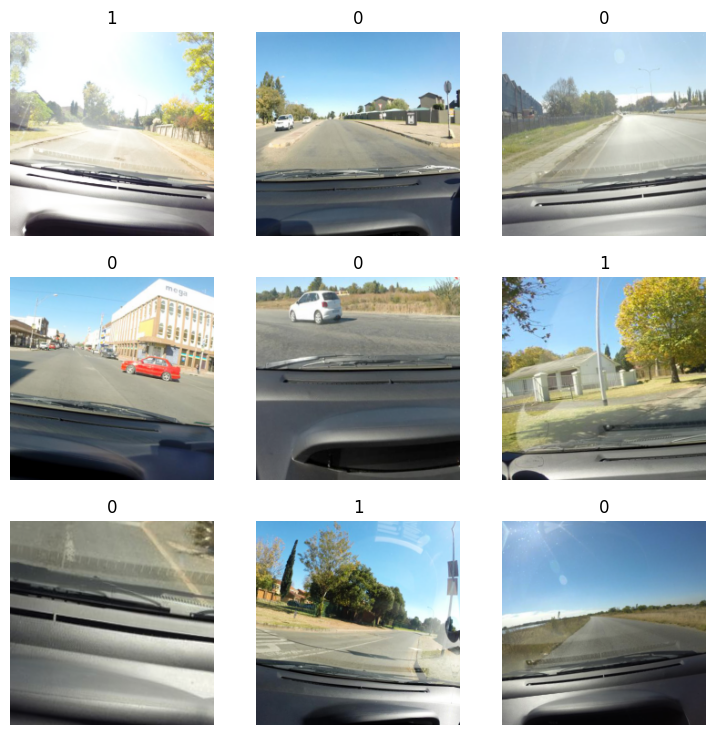

In [7]:
dls.show_batch(max_n=9)

In [8]:
learn = vision_learner(dls, resnet34, pretrained=True, metrics=[accuracy]).to_fp16()


In [9]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.987521,0.459610,0.776398,02:22
1,0.770747,0.357941,0.854658,02:11
2,0.571662,0.274442,0.894410,02:24
3,0.480011,0.189075,0.924224,02:28
4,0.397631,0.181177,0.924224,02:24
5,0.344356,0.165530,0.945342,02:44
6,0.318030,0.159886,0.939130,02:18
7,0.303202,0.151211,0.940373,02:34
8,0.298291,0.147158,0.940373,02:33
9,0.272578,0.144411,0.941615,02:24


c:\Users\Giles\miniconda3\envs\vision\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
predictions, targets = learn.get_preds(ds_idx=1)  

accuracy = accuracy_score(targets, predictions.argmax(dim=-1))

print("Test Accuracy:", accuracy)


Test Accuracy: 0.9416149068322981


In [10]:
learn.save('saved-1')

Path('models/saved-1.pth')

In [11]:
learn.unfreeze()

SuggestedLRs(valley=5.248074739938602e-05)

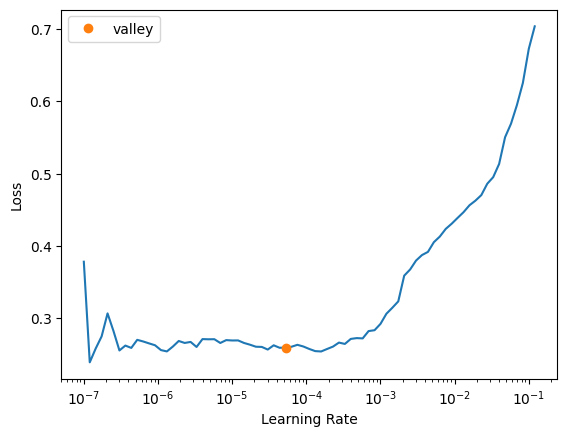

In [12]:

learn.lr_find()